This is a task to get the information in FITS image, which is commonly used in astronomy

In [1]:
import os
import numpy as np

from astropy import wcs
from astropy.io import fits

import matplotlib
#matplotlib.use('PDF')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

import nbimporter
import function as func

In [2]:
# Open FITS image cube
fitsimage = '/home/tcc/data/CH30CHO.fits'
#'/home/tcc/gausspy+/data/grs-test_field.fits'
#'/home/tcc/data/CH30CHO.fits'

# transform FITS to HDU
Ihdu = fits.open(fitsimage)

In [3]:
Ihdu[0].header

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    4  /                                               
NAXIS1  =                  611  /                                               
NAXIS2  =                  658  /                                               
NAXIS3  =                 1532  /                                               
NAXIS4  =                    1  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BUNIT   = 'JY/BEAM '  /                                                         
DATE-OBS= '2015-10-05T19:52:06.5'  /                                            
OBSRA   =    2.66411733937E+

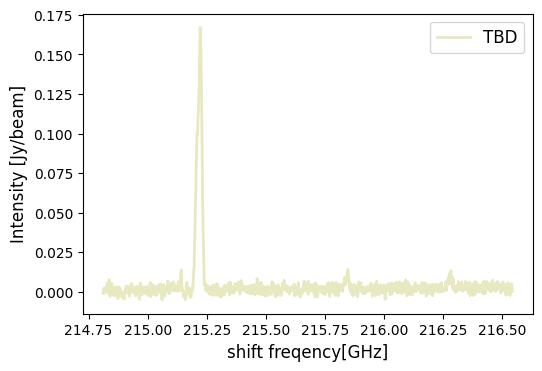

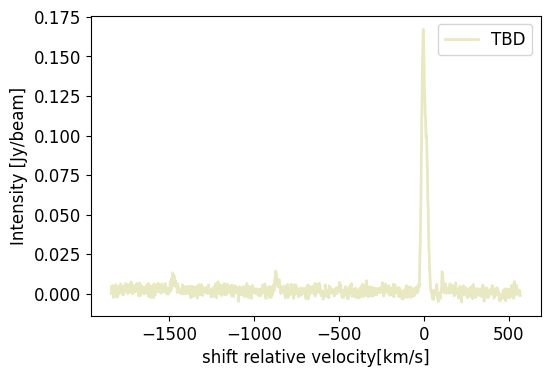

In [4]:
naxis1 = Ihdu[0].header['naxis1']
naxis2 = Ihdu[0].header['naxis2']
naxis3 = Ihdu[0].header['naxis3']

crpix3 = Ihdu[0].header['crpix3']
cdelt3 = Ihdu[0].header['cdelt3']
crval3 = Ihdu[0].header['crval3']

rest_freq = 215.219259 * 1e9
c         = 299792458

velocity_array = np.zeros( naxis3 )
velocity_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3

freq_array = rest_freq * (1 - velocity_array / c)

xpix = 256
ypix = 363
intensity_array = Ihdu[0].data[0][:, ypix, xpix]
#print(intensity_array.shape)
#func.plot_spectra(freq_array/1e9, intensity_array)
#func.plot_spectra(velocity_array/1e3, intensity_array, xlabel='Velocity[km/s]')

centroid_freq = func.fit_1dgaus(freq_array/1e9, intensity_array, plot = False, kind = 'freq') 
centroid_velo = func.fit_1dgaus(freq_array = velocity_array/1e3, intensity_array = intensity_array, plot = False, kind = 'velo',xlabel='Velocity[km/s]')


func.undoppler(freq_array, intensity_array,velocity_array, centroid_freq=centroid_freq, centroid_velo=centroid_velo, plot=True)

## Calculate the parameter about fitting

nan


/home/tcc/software/anaconda3/envs/astroimgAna/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/home/tcc/software/anaconda3/envs/astroimgAna/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/home/tcc/software/anaconda3/envs/astroimgAna/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


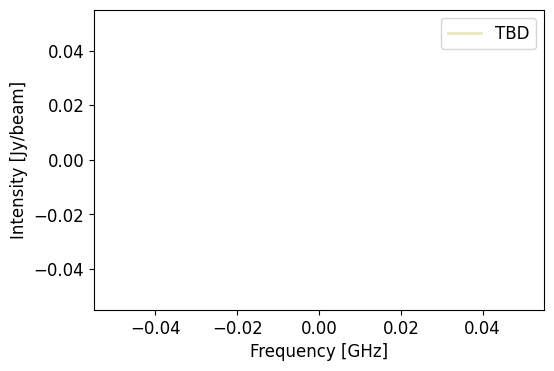

In [32]:
## Calculate the standard deviation

freqGHz_start = 215.00
freqGHz_end   = 215.10

freq_startpix = round( ( freqGHz_start*1e9 - crval3 )/ cdelt3 + crpix3 )
freq_endpix   = round( ( freqGHz_end  *1e9 - crval3 )/ cdelt3 + crpix3 )

#print(freq_startpix, freq_endpix)

func.plot_spectra( freq_array[freq_startpix:freq_endpix]/1e9, intensity_array[freq_startpix:freq_endpix])


## calculate the standard deviation as measurement errors (y_err)
std = np.std(intensity_array[freq_startpix:freq_endpix])
print(std)


## Follow <https://splatalogue.online//> to get rest frequency

In [ ]:
# https://splatalogue.online//`
CI_restfreq = 492.16065100          # GHz
HCOplus3to2_restfreq = 267.55762590 # GHz

## To open the pixel failed to fit 1d gaussian

In [ ]:
freq_array = np.zeros( naxis3 )
freq_array = crval3 + ( np.arange(naxis3) + 1 - crpix3 ) * cdelt3

xpix = 717
ypix = 701
intensity_array = Ihdu[0].data[0][:,ypix, xpix]
func.plot_spectra(freq_array/1e9, intensity_array, datalabel = f'(i,j)=({xpix},{ypix})')
